In [54]:
import pandas as pd

In [55]:
import datetime as dt

In [56]:
import matplotlib.pyplot as plt

In [57]:
import seaborn as sns

In [58]:
il = pd.read_csv('NYC AirBnB Dummy Data.csv', sep=';', encoding ='unicode_escape')
il.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire home/apt,225 dollars,"Manhattan, Midtown",Jennifer,21/05/2021
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89 dollars,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200 dollars,"Manhattan, Murray Hill",Chris,21/06/2022
3,5178,Large Furnished Room Near B'way,private room,79 dollars,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150 dollars,"Manhattan, Chinatown",Ben,21/06/2009


In [59]:
il.dtypes

listing_id            int64
description          object
room_type            object
price                object
neighborhood_full    object
host_name            object
last_review          object
dtype: object

In [60]:
il.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   listing_id         24999 non-null  int64 
 1   description        24999 non-null  object
 2   room_type          24999 non-null  object
 3   price              24999 non-null  object
 4   neighborhood_full  24999 non-null  object
 5   host_name          24991 non-null  object
 6   last_review        24999 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [61]:
il[il.duplicated()]

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review


In [62]:
il.isna().sum()

listing_id           0
description          0
room_type            0
price                0
neighborhood_full    0
host_name            8
last_review          0
dtype: int64

In [63]:
il[il.isnull().any(axis=1)]

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
263,100184,Bienvenue,private room,50 dollars,"Queens, Queens Village",NaN,21/07/2008
3040,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,Private room,86 dollars,"Manhattan, Harlem",NaN,21/05/2023
4039,6292866,Modern Quiet Gem Near All,entire home/apt,85 dollars,"Brooklyn, East Flatbush",NaN,21/06/2019
4269,6786181,R&S Modern Spacious Hideaway,Entire home/apt,100 dollars,"Brooklyn, East Flatbush",NaN,21/06/2019
6338,12113879,"Sunny, Large West Village 1 BR Near Everything",Entire home/apt,220 dollars,"Manhattan, Chelsea",NaN,21/07/2002
8060,15648096,Spacious 2 bedroom close to Manhattan,Entire home/apt,75 dollars,"Bronx, Highbridge",NaN,21/07/2007
12128,21867710,Amazing room in the centre on Manhatten! Welcome!,Private room,120 dollars,"Manhattan, Hell's Kitchen",NaN,21/01/2001
12164,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,Private room,120 dollars,"Manhattan, Hell's Kitchen",NaN,21/01/2001


In [64]:
il = il.copy()
il.fillna({'host_name':0}, inplace=True)

In [65]:
il.isna().sum()

listing_id           0
description          0
room_type            0
price                0
neighborhood_full    0
host_name            0
last_review          0
dtype: int64

In [66]:
il['price'] = il['price'].str.strip('dollars')

In [67]:
il['price'] = il['price'].astype('int')
il.dtypes

listing_id            int64
description          object
room_type            object
price                 int32
neighborhood_full    object
host_name            object
last_review          object
dtype: object

In [68]:
il.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire home/apt,225,"Manhattan, Midtown",Jennifer,21/05/2021
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200,"Manhattan, Murray Hill",Chris,21/06/2022
3,5178,Large Furnished Room Near B'way,private room,79,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150,"Manhattan, Chinatown",Ben,21/06/2009


In [69]:
il.room_type.unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Shared room', 'SHARED ROOM'], dtype=object)

In [70]:
il['room_type'] = il['room_type'].str.title()
il.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire Home/Apt,225,"Manhattan, Midtown",Jennifer,21/05/2021
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,200,"Manhattan, Murray Hill",Chris,21/06/2022
3,5178,Large Furnished Room Near B'way,Private Room,79,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,150,"Manhattan, Chinatown",Ben,21/06/2009


In [71]:
il.room_type.unique()

array(['Entire Home/Apt', 'Private Room', 'Shared Room'], dtype=object)

In [72]:
il['neighborhood_full'].str.split(',', expand=True)

,0,1,2
0,Manhattan,Midtown,None
1,Brooklyn,Clinton Hill,None
2,Manhattan,Murray Hill,None
3,Manhattan,Hell's Kitchen,None
4,Manhattan,Chinatown,None
...,...,...,...
24994,Queens,Jamaica,None
24995,Queens,Long Island City,None
24996,Brooklyn,Borough Park,None
24997,Brooklyn,Bushwick,None


In [73]:
il[['area', 'subarea', 'none']] = il['neighborhood_full'].str.split(',', expand=True)
il = il.drop(columns=['none'])
il.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,subarea
0,2595,Skylit Midtown Castle,Entire Home/Apt,225,"Manhattan, Midtown",Jennifer,21/05/2021,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,200,"Manhattan, Murray Hill",Chris,21/06/2022,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,Private Room,79,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,150,"Manhattan, Chinatown",Ben,21/06/2009,Manhattan,Chinatown


In [74]:
il['last_review'] = '20' + il['last_review'].astype(str)
il['last_review'] = il['last_review'].str.split('/').apply(lambda x: '/'.join(x[::-1]))
il['last_review'] = il['last_review'].str[2:]

In [75]:
il.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,subarea
0,2595,Skylit Midtown Castle,Entire Home/Apt,225,"Manhattan, Midtown",Jennifer,21/05/2021,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,05/07/2021,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,200,"Manhattan, Murray Hill",Chris,22/06/2021,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,Private Room,79,"Manhattan, Hell's Kitchen",Shunichi,24/06/2021,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,150,"Manhattan, Chinatown",Ben,09/06/2021,Manhattan,Chinatown


In [76]:
import datetime as dt

In [77]:
il['last_review'] = pd.to_datetime(il['last_review']).dt.date
il.dtypes

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/05/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\panda

listing_id            int64
description          object
room_type            object
price                 int32
neighborhood_full    object
host_name            object
last_review          object
area                 object
subarea              object
dtype: object

In [78]:
il.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,subarea
0,2595,Skylit Midtown Castle,Entire Home/Apt,225,"Manhattan, Midtown",Jennifer,2021-05-21,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,2021-05-07,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,200,"Manhattan, Murray Hill",Chris,2021-06-22,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,Private Room,79,"Manhattan, Hell's Kitchen",Shunichi,2021-06-24,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,150,"Manhattan, Chinatown",Ben,2021-09-06,Manhattan,Chinatown


In [79]:
today = dt.date.today()
il[il['last_review'] > today]

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,subarea
10877,20364240,Sunny lifestyle room,Private Room,54,"Brooklyn, Crown Heights",Wesly/Jessica,2022-06-23,Brooklyn,Crown Heights
10912,20433620,Time square/ Bryant park,Entire Home/Apt,170,"Manhattan, Midtown",Jonathan,2022-06-23,Manhattan,Midtown


In [80]:
il.loc[il['last_review'] > today, 'last_review'] = today
il[il['last_review'] > today]

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,subarea


In [81]:
il.describe()

,listing_id,price
count,2.499900e+04,24999.000000
mean,2.056006e+07,141.891516
std,1.098472e+07,147.636409
min,2.595000e+03,0.000000
25%,1.187292e+07,69.000000
50%,2.225188e+07,105.000000
75%,3.025357e+07,175.000000
max,3.586792e+07,7500.000000


In [82]:
il.agg({'price': ['mean', 'median', 'min', 'max', 'count']})

,price
mean,141.891516
median,105.000000
min,0.000000
max,7500.000000
count,24999.000000


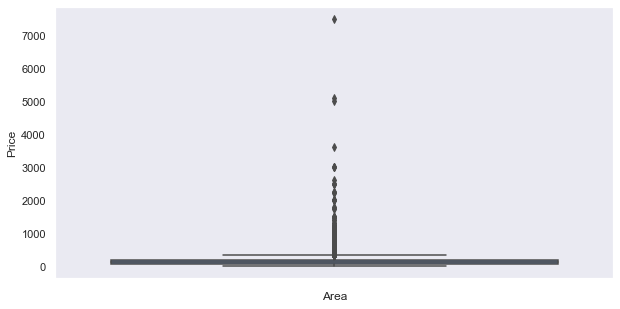

In [83]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=il).set_title
sns.set_theme(style='dark')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [84]:
lowq = il['price'].quantile(0.10)
lowq

49.0

In [85]:
highq = il['price'].quantile(0.90)
highq

250.0

In [86]:
il = il.drop(il[il.price < lowq].index)

In [87]:
il = il.drop(il[il.price > highq].index)

In [88]:
import matplotlib.pyplot as plt

In [89]:
import seaborn as sns

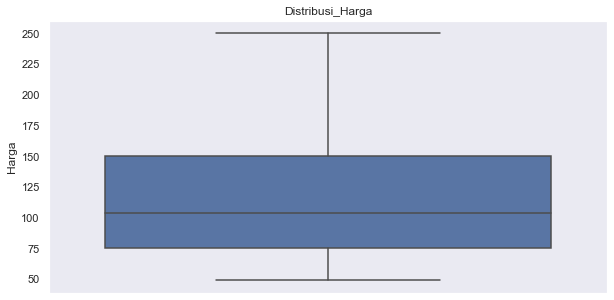

In [90]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=il).set_title('Distribusi_Harga')
sns.set_theme(style='dark')
plt.ylabel('Harga')
plt.show()

In [91]:
il.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20247 entries, 0 to 24998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   listing_id         20247 non-null  int64 
 1   description        20247 non-null  object
 2   room_type          20247 non-null  object
 3   price              20247 non-null  int32 
 4   neighborhood_full  20247 non-null  object
 5   host_name          20247 non-null  object
 6   last_review        20247 non-null  object
 7   area               20247 non-null  object
 8   subarea            20247 non-null  object
dtypes: int32(1), int64(1), object(7)
memory usage: 1.5+ MB


In [92]:
il.to_excel('Air_BNB_Data_Clean.xlsx', encoding='utf-8', index=False)